# Gemeinderatswahl 2024 in Freiburg

Hier praesentiere und analysiere ich die Gemeinderatswahlergbnisse aus Freiburg im Breisgau. 

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import os
from matplotlib import pyplot as plt
import json
#import plotly.express as px
#import plotly.graph_objects as go
import geopandas 
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings('ignore')
from functions_wahl import *

In [2]:
#Daten bekommen und kombinieren mit geografischen und statistischen Stadtdaten 
#get_and_save_komm() jetzt ausgezaehlt kein download mehr noetig
Stadtteile,Stadtbezirke=process_geo()
gesamt,comb2,wahl_bezirke=get_process_wahl()
wahl_bezirke=get_percent(wahl_bezirke)
joined=Stadtbezirke.join(comb2)
gem19_stadtbezirke=get_gem19()    
gesamt=combiniere_19(gesamt,gem19_stadtbezirke,area='gesamt')
joined=combiniere_19(joined,gem19_stadtbezirke,area='Stadtbezirke')

Wahlbezirke 247
ausgezaehlte Wahlbezirke 247


## Gesamtergebnis

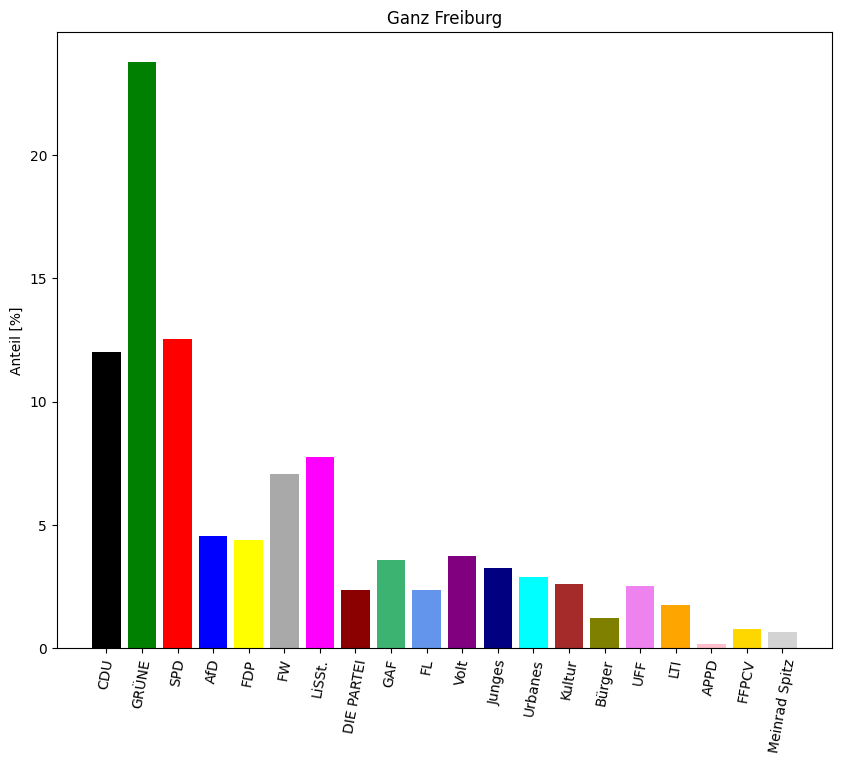

In [3]:
make_bar_plot(gesamt,title='Ganz Freiburg')

Veraenderung zur Gemeinderatswahl 2019. 

Buergerliches Lager Veraenderung: -0.7 %
Linken Lager Veraenderung: -0.3 %
rechtsextreme Veraenderung: 0.9 %
Sonstige: Veraenderung: 0.3 %


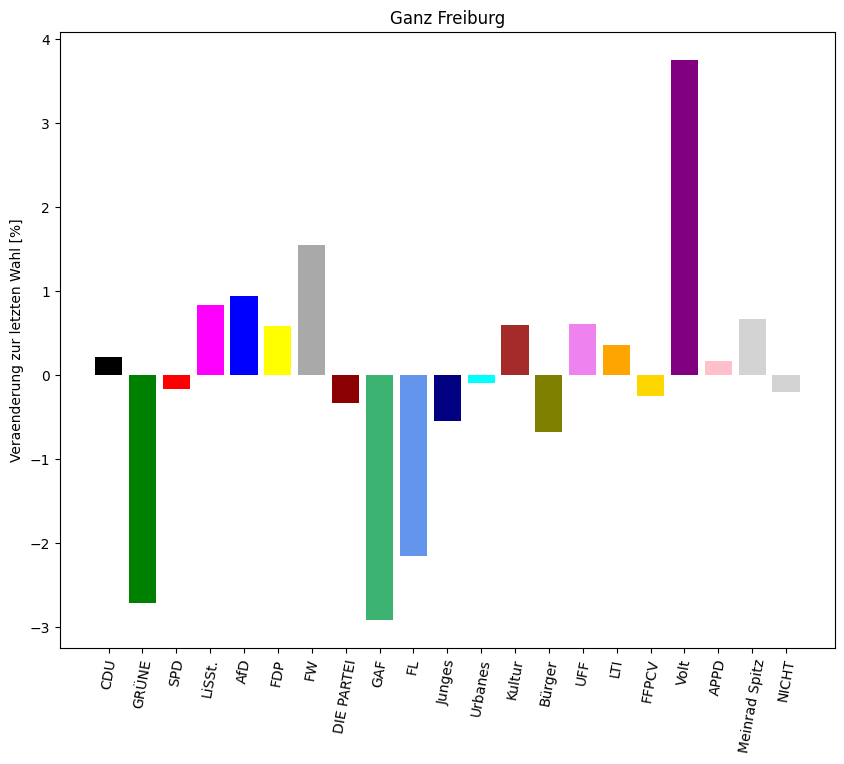

In [4]:
print(f"Buergerliches Lager Veraenderung: {np.round(gesamt.loc[0,['CDU_differenz','Bürger_F_differenz','FFPCV_differenz','FDP_differenz','FL_differenz','FW_differenz']].sum(),1)} %")
print(f"Linken Lager Veraenderung: {np.round(gesamt.loc[0,['GRÜNE_differenz','SPD_differenz','GAF_differenz','Volt_differenz','Junges_F_differenz','LiSSt._differenz','Urbanes_F_differenz','Kultur_differenz','UFF_differenz','LTI_differenz']].sum(),1)} %")
print(f"rechtsextreme Veraenderung: {np.round(gesamt.loc[0,['AfD_differenz',]].sum(),1)} %")
print(f"Sonstige: Veraenderung: {np.round(gesamt.loc[0,['DIE_PARTEI_differenz','NICHT_differenz','APPD_differenz','Meinrad_Spitz_differenz']].sum(),1)} %")

make_bar_plot(gesamt,title='Ganz Freiburg',diff=True)

Gruene und GAF haben am meisten verloren, zum Teil wohl zur neuen Partei Volt. Es gab auch noch weitere Aenderungen im weiten Sinne linken Lager, so haben Junges Freiburg etwas Verloren und Kulturliste, UFF und LTI gewonnen. Die zersplitterung in k=mehr Parteien setzte sich also fort. Ingesamt gab es sehr leichten Verluste fuer das 'Linke' Lager, wobei zu bemerekn ist, dass es nicht wirklich ein Lager in der Lokalpolitik ist. 

Im Buergelichen Lager hat Freiburg Lebnswert deutlich verloren und die meisten anderen gewonnen. Also haben die tradionellen Geminderatsparteien gewonnen. Ingesamt hat es leicht verloren. 

Die Afd hat sichtbar gewonnen bleibt aber weiter schwach in Freiburg.

Die sonsisten (unklar und Spassparteien) sind auch etwa gleich geblieben. Insgesamt waren die Veraenderungen klein.

Nun Sitzverteilung. 

 48 wurden zugeteilt wie es sein sollte


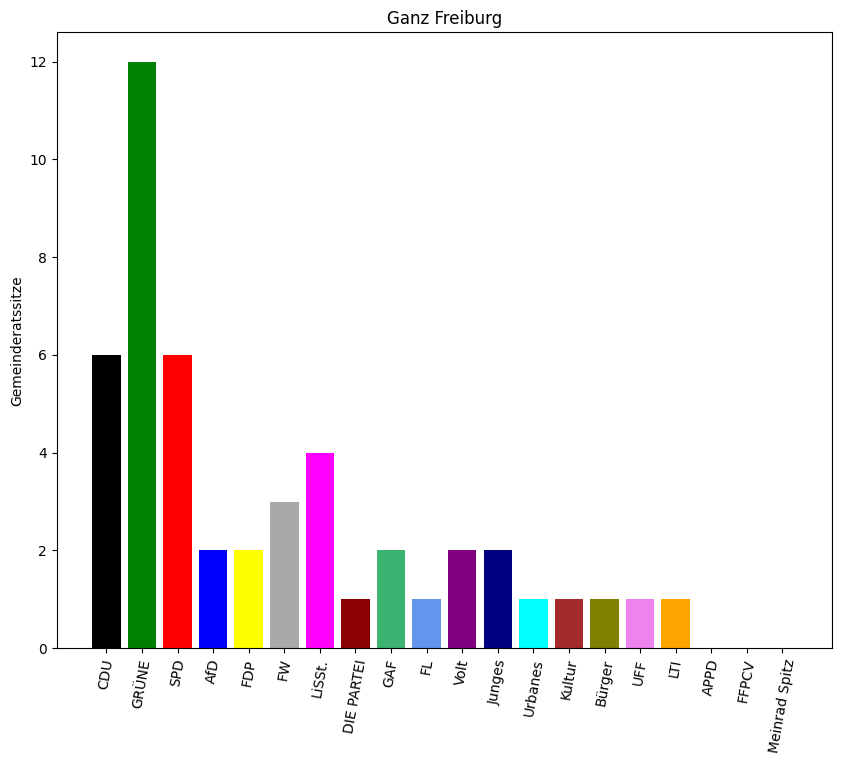

In [5]:
test_res=sainte_l(gesamt.loc[0,:])
make_bar_plot(gesamt,sitze=48,title='Ganz Freiburg')

Nun Vergleich mit 2019. 

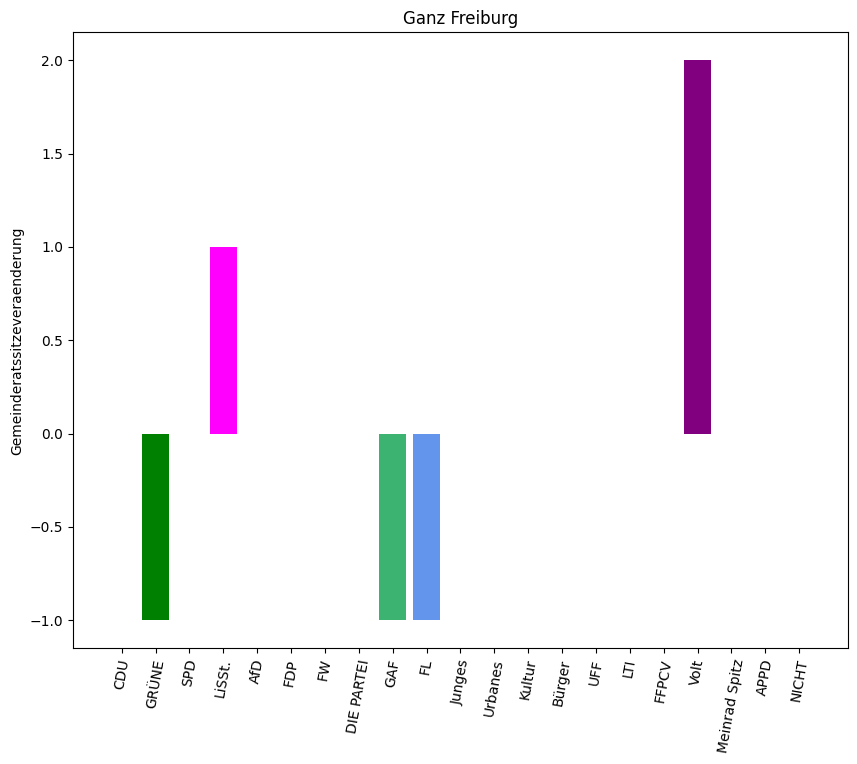

In [6]:
make_bar_plot(gesamt,sitze=48,title='Ganz Freiburg',diff=True)

Volt und Linke Liste haben gewonnen, und Gruene, GAF und Freiburg Lbenswert verloren. Ingesamt hat das Linke Lager einen Sitz gewonne, die meiste Veraenderung ist innerhalb der Lager und klein. 

## Karten

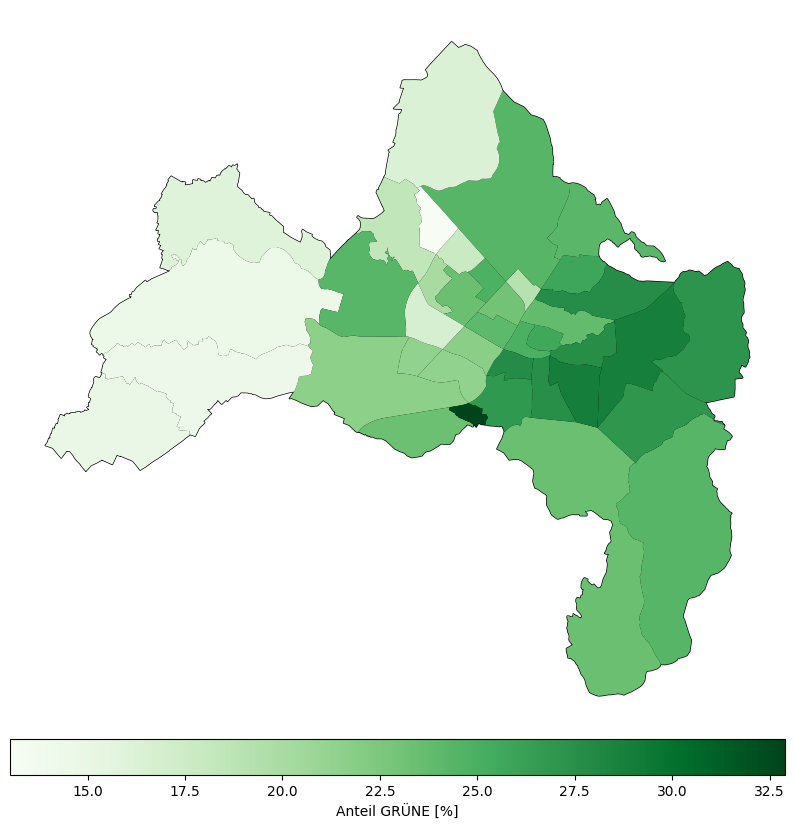

In [7]:
karte_stadtbezirke(joined,'GRÜNE')

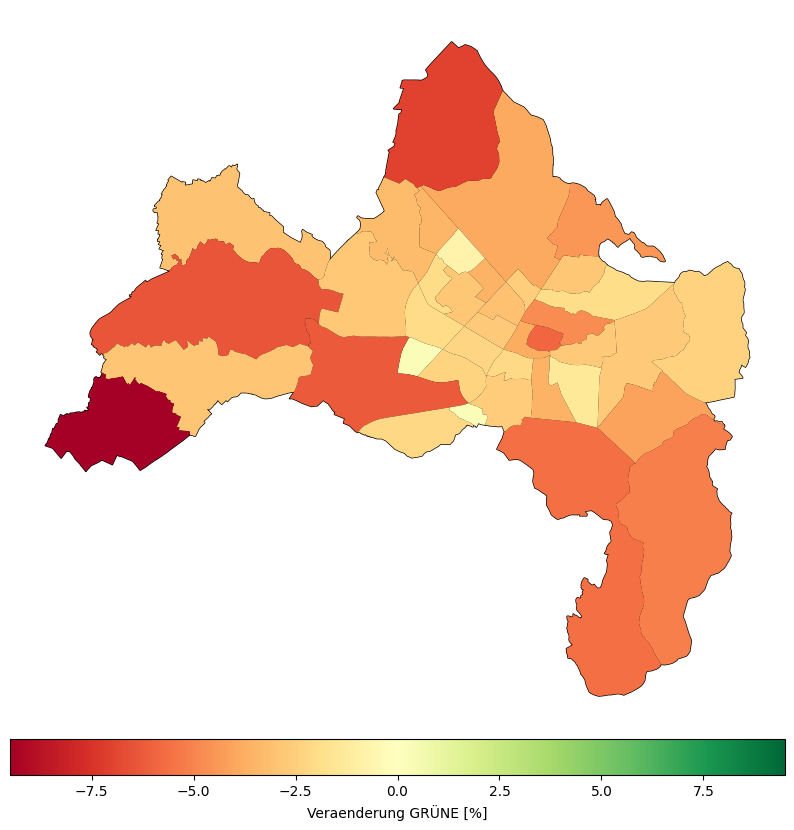

In [8]:
karte_stadtbezirke(joined,'GRÜNE_differenz')

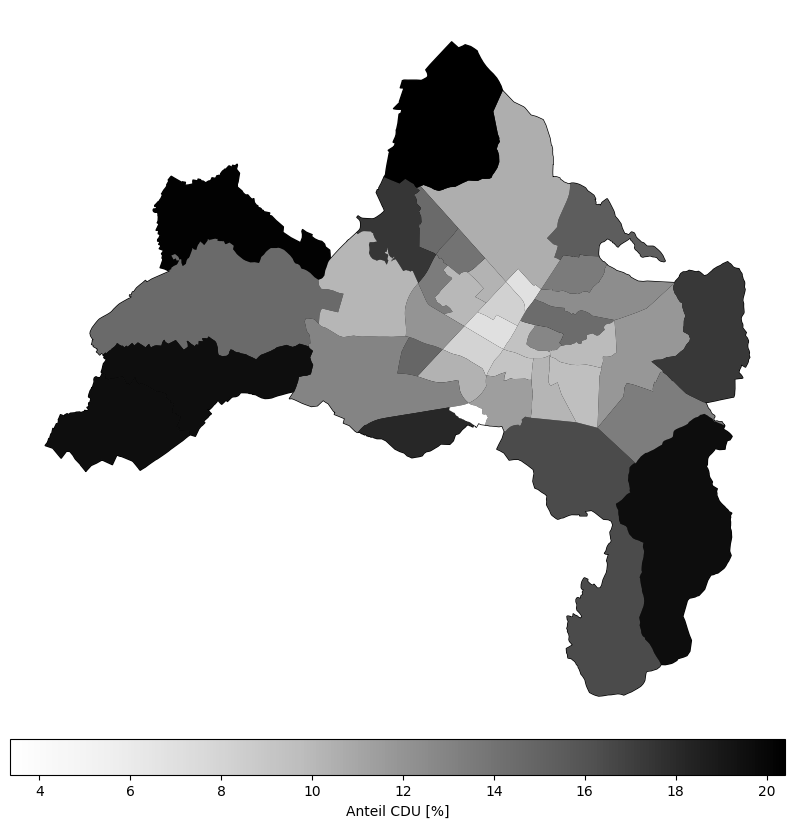

In [9]:
karte_stadtbezirke(joined,'CDU')

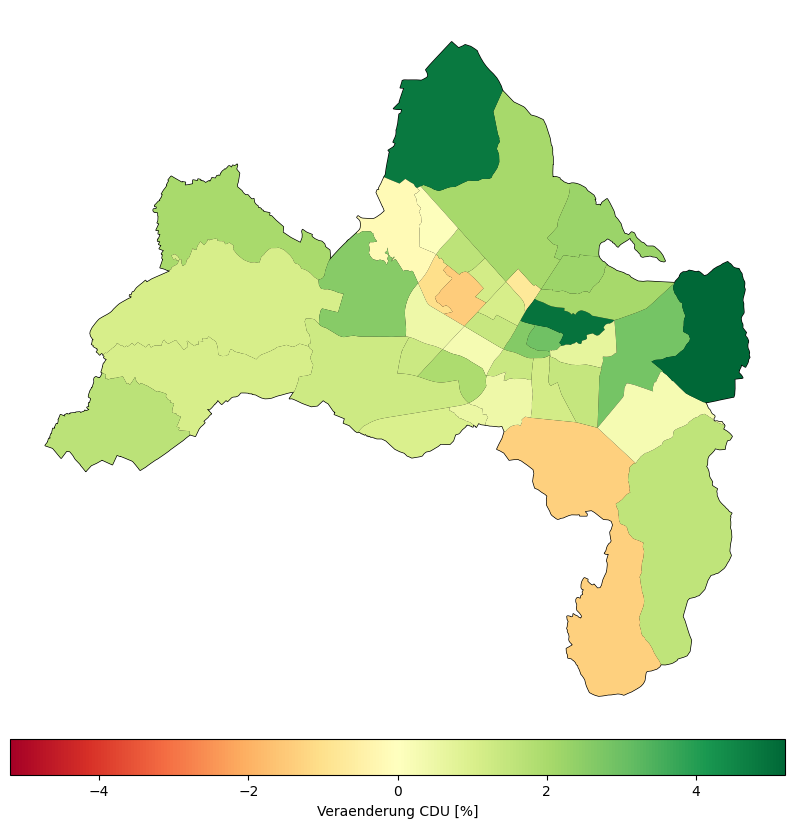

In [10]:
karte_stadtbezirke(joined,'CDU_differenz')

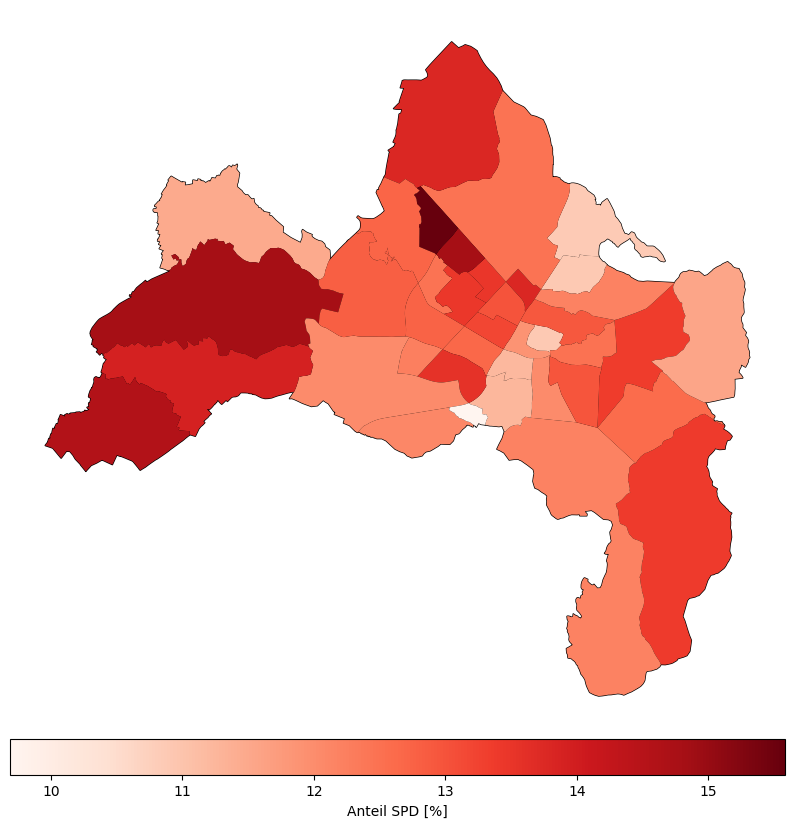

In [11]:
karte_stadtbezirke(joined,'SPD')

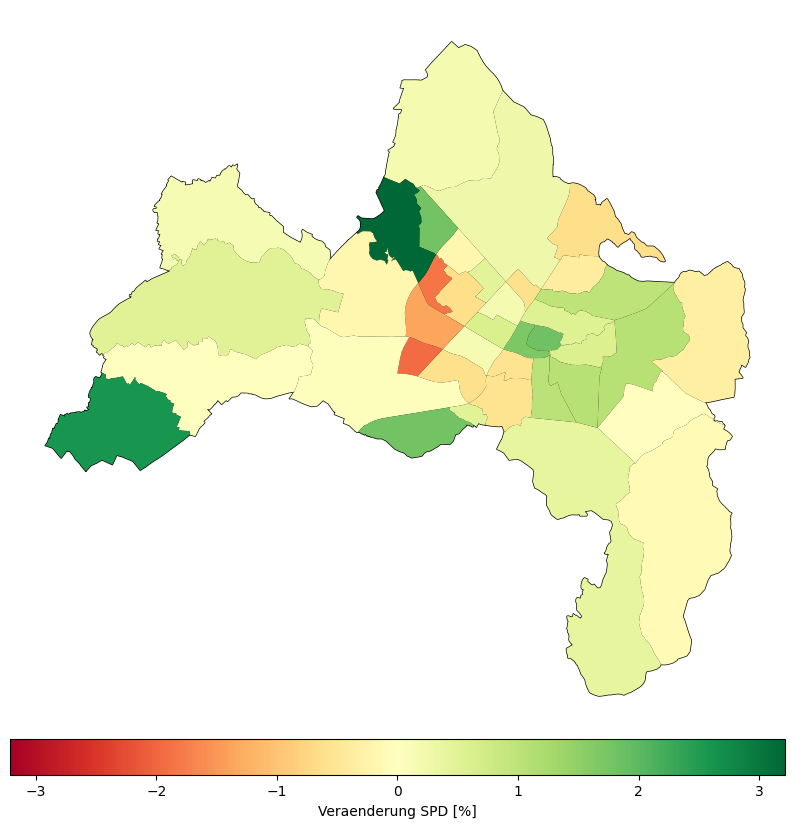

In [12]:
karte_stadtbezirke(joined,'SPD_differenz')

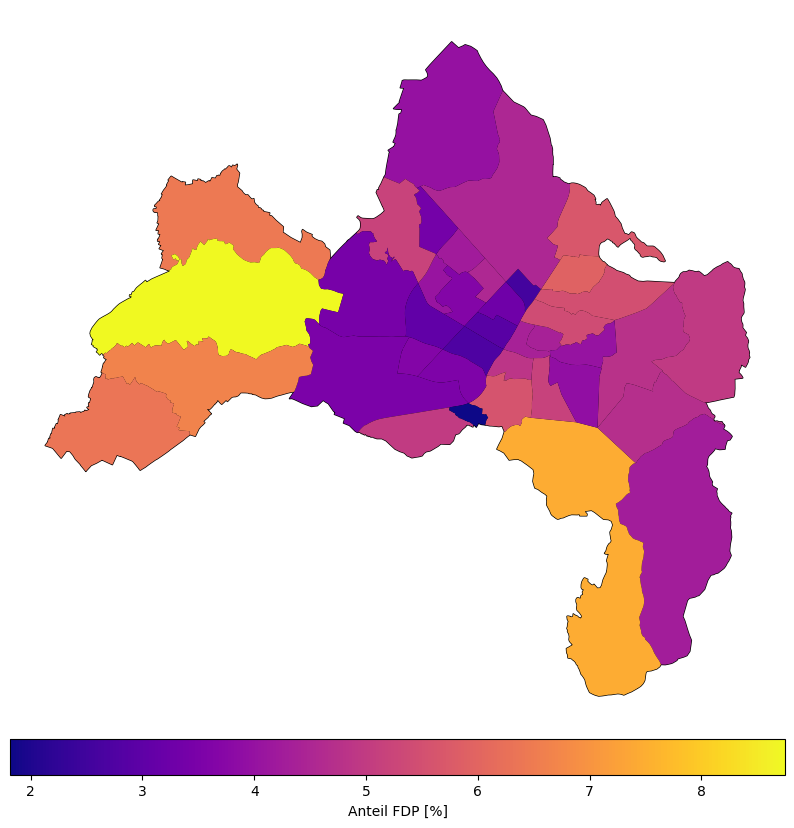

In [13]:
karte_stadtbezirke(joined,'FDP')

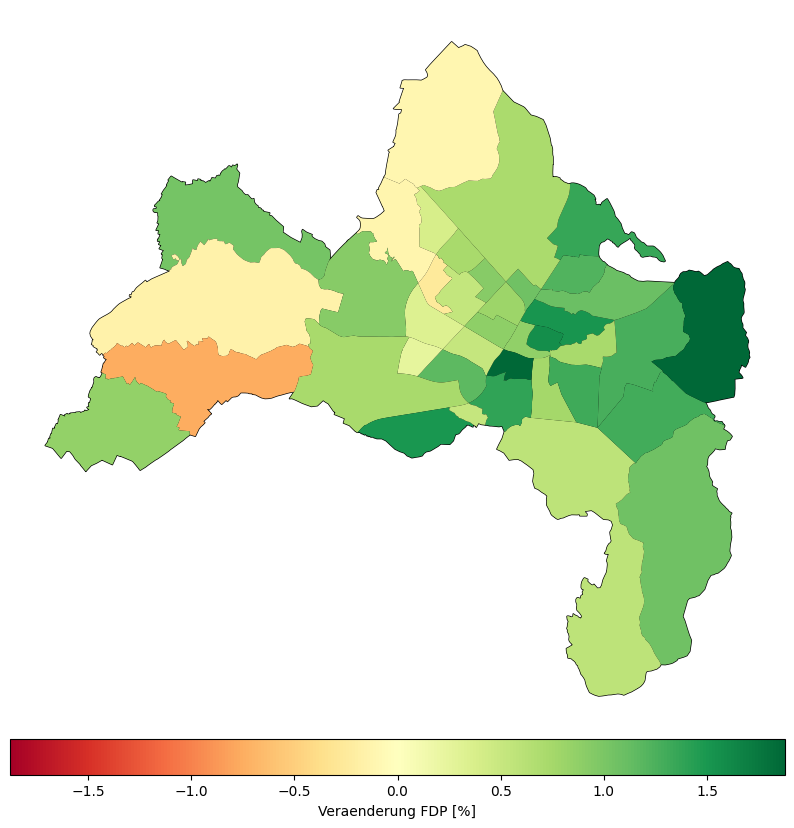

In [15]:
karte_stadtbezirke(joined,'FDP_differenz')

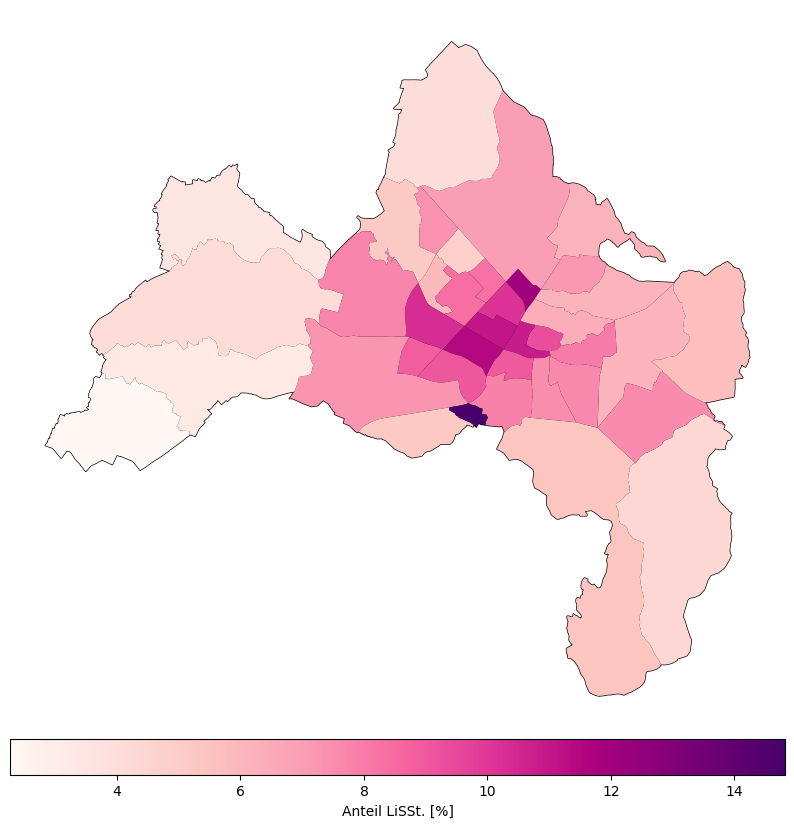

In [16]:
karte_stadtbezirke(joined,'LiSSt.')

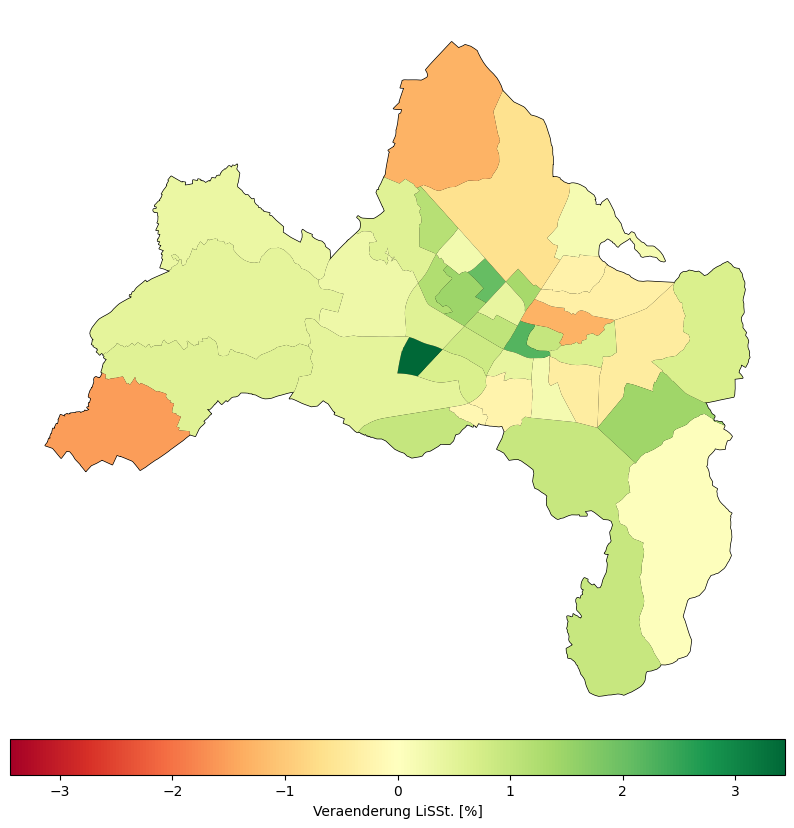

In [17]:
karte_stadtbezirke(joined,'LiSSt._differenz')

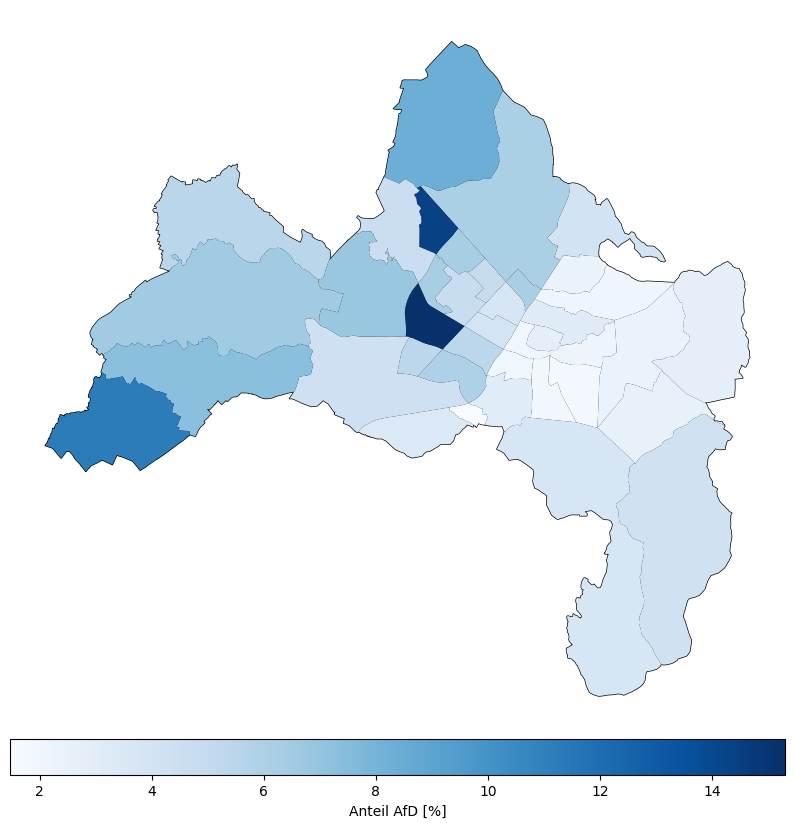

In [18]:
karte_stadtbezirke(joined,'AfD')

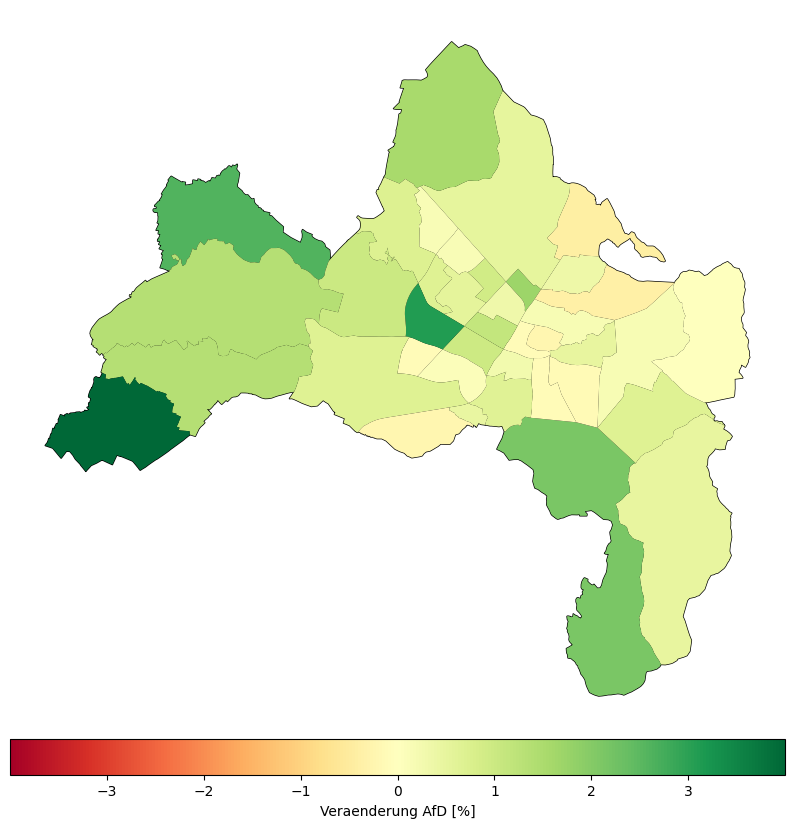

In [19]:
karte_stadtbezirke(joined,'AfD_differenz')

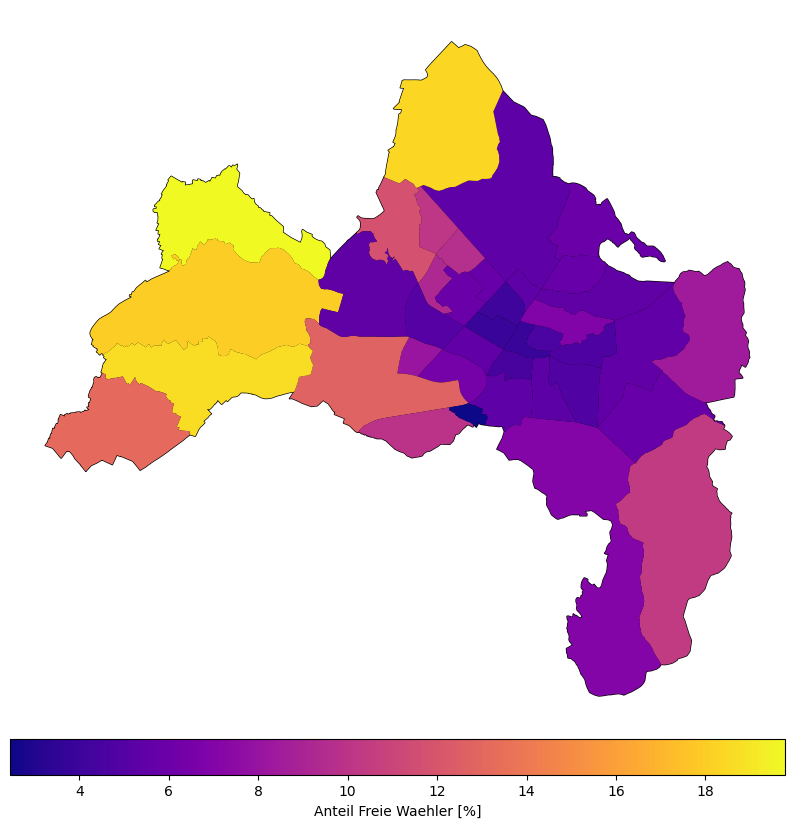

In [20]:
karte_stadtbezirke(joined,'FW')

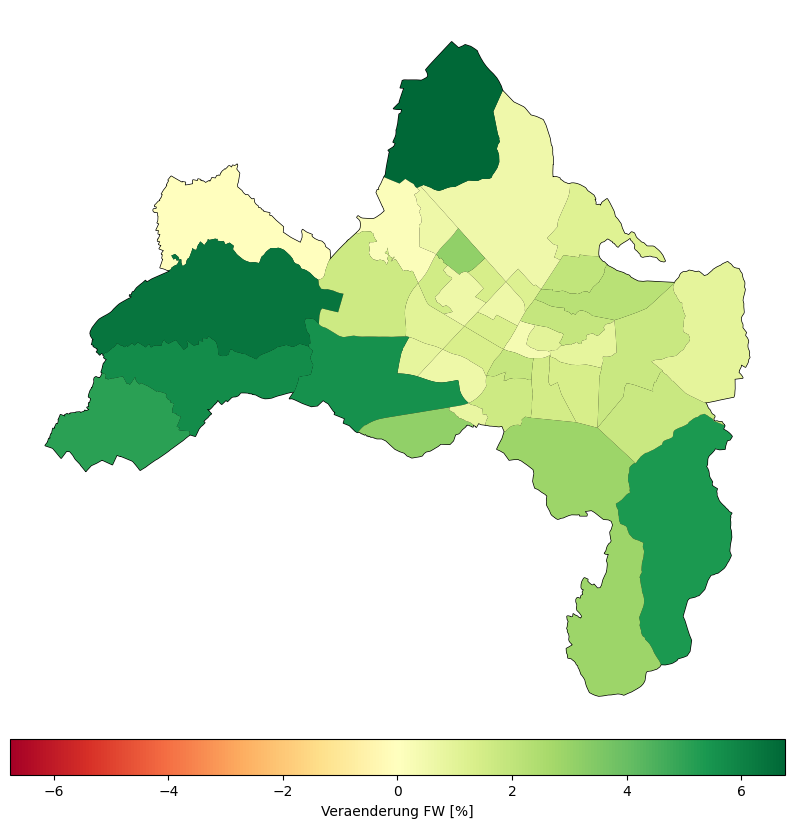

In [21]:
karte_stadtbezirke(joined,'FW_differenz')

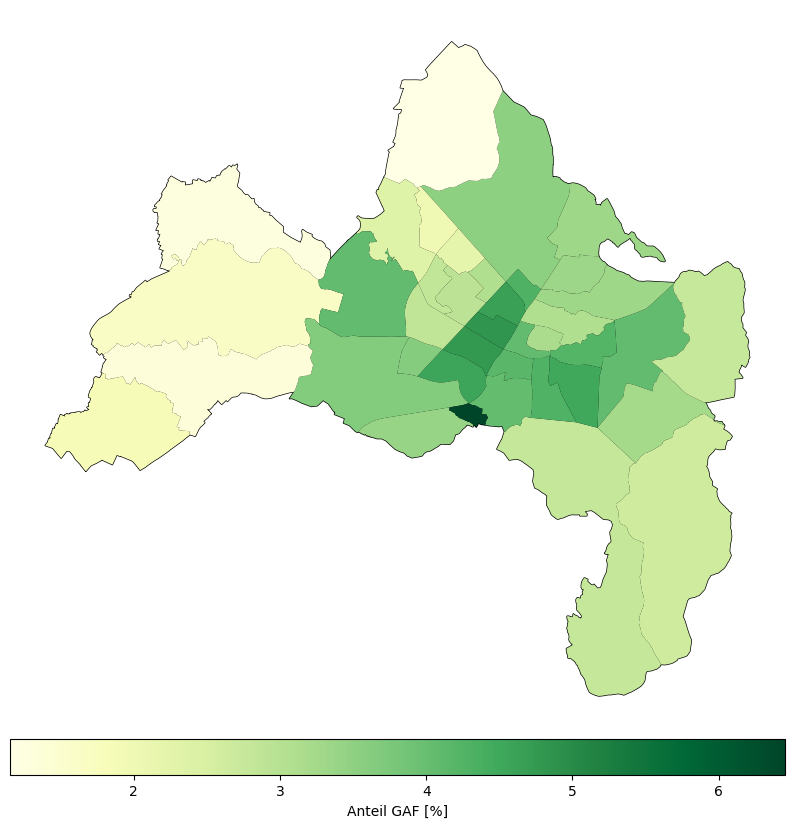

In [22]:
karte_stadtbezirke(joined,'GAF')

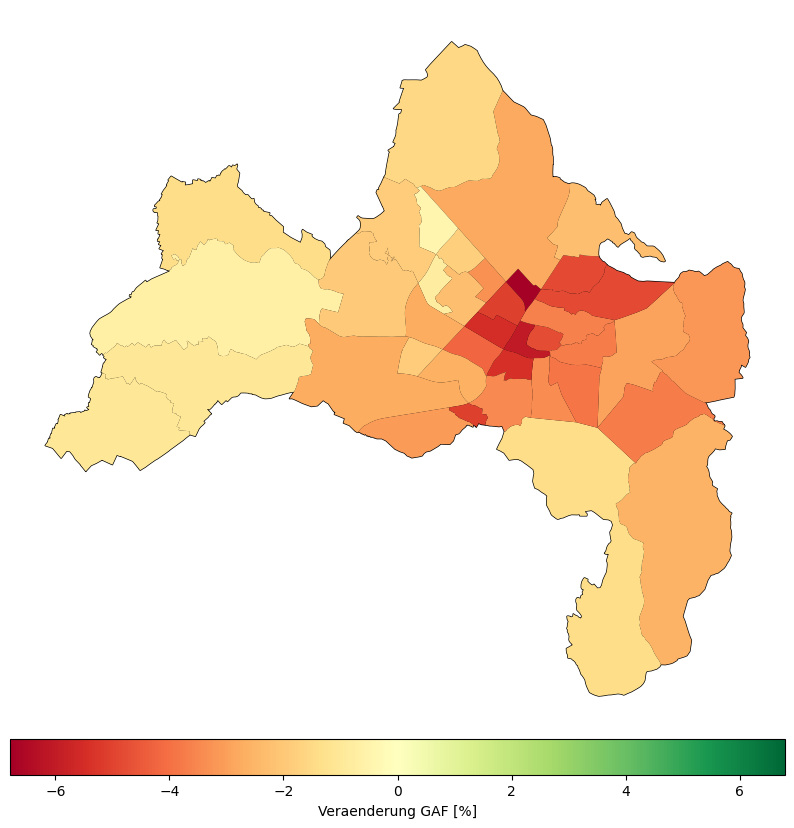

In [23]:
karte_stadtbezirke(joined,'GAF_differenz')

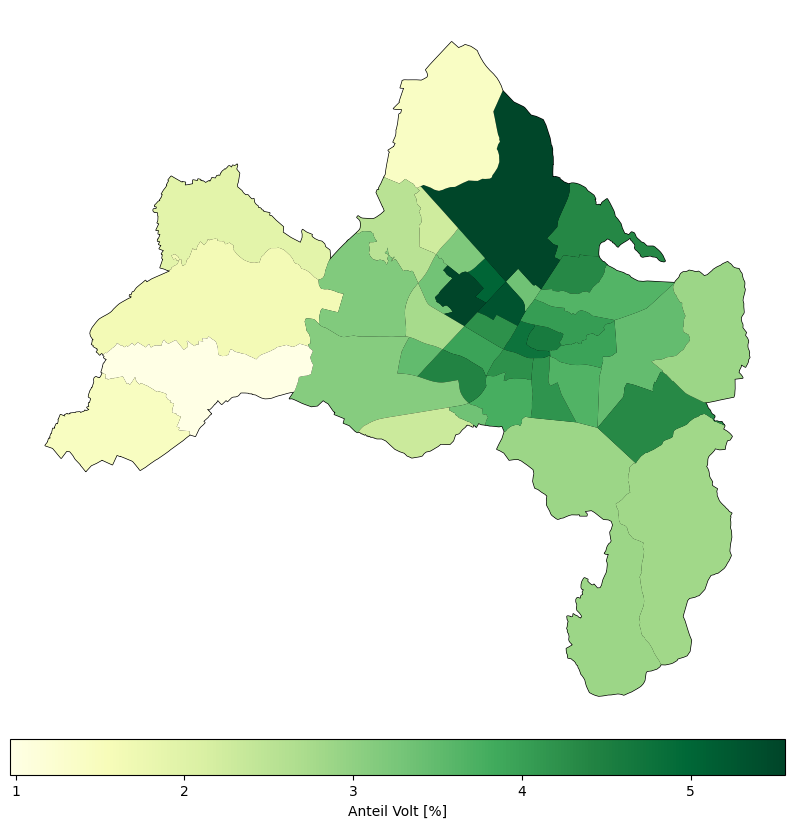

In [23]:
karte_stadtbezirke(joined,'Volt')

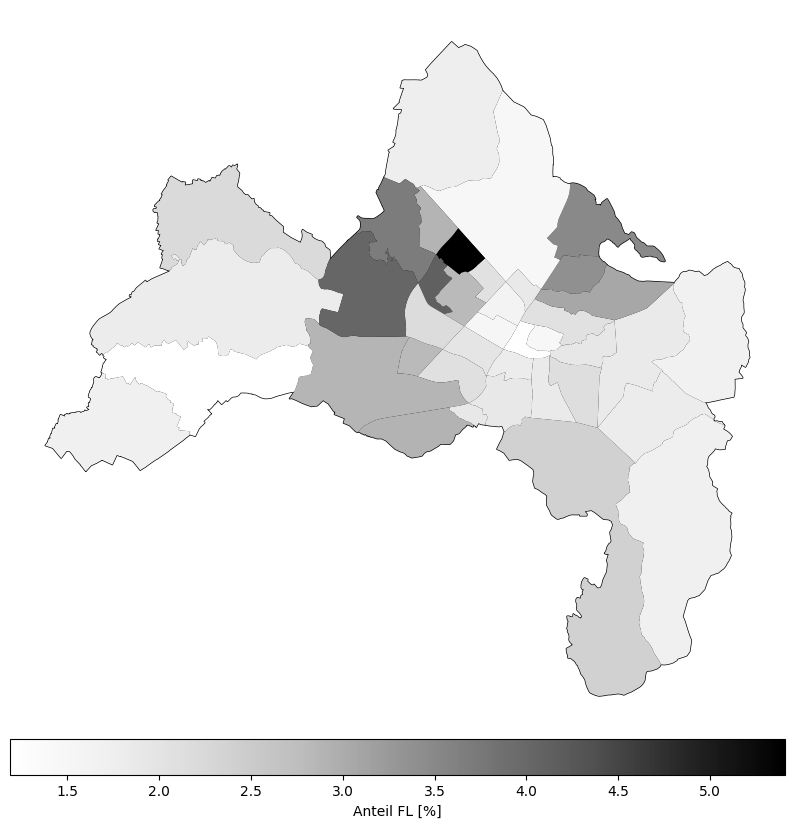

In [24]:
karte_stadtbezirke(joined,'FL')

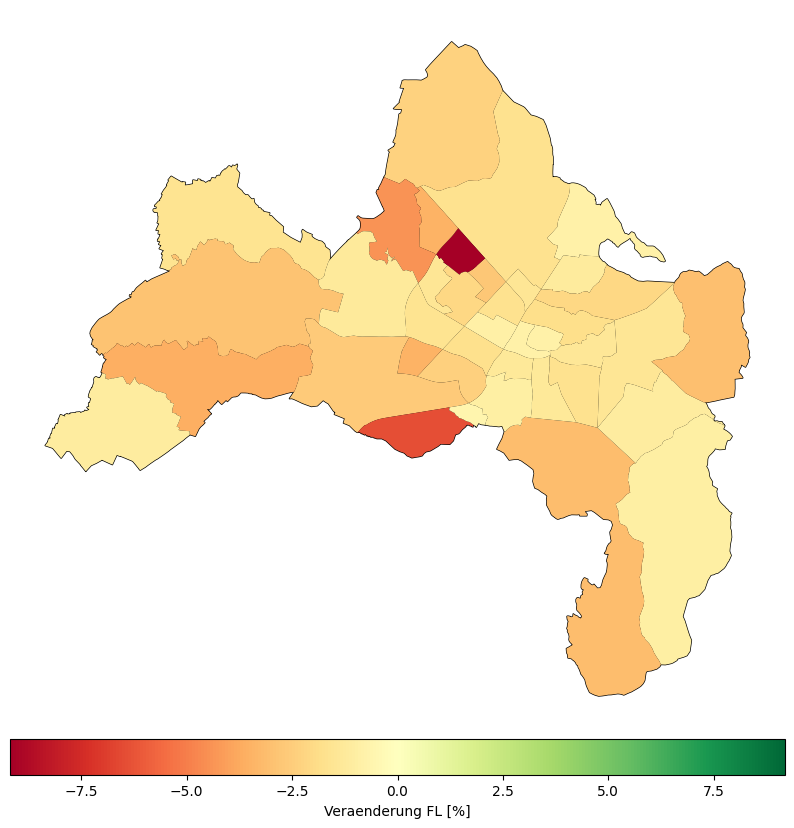

In [24]:
karte_stadtbezirke(joined,'FL_differenz')

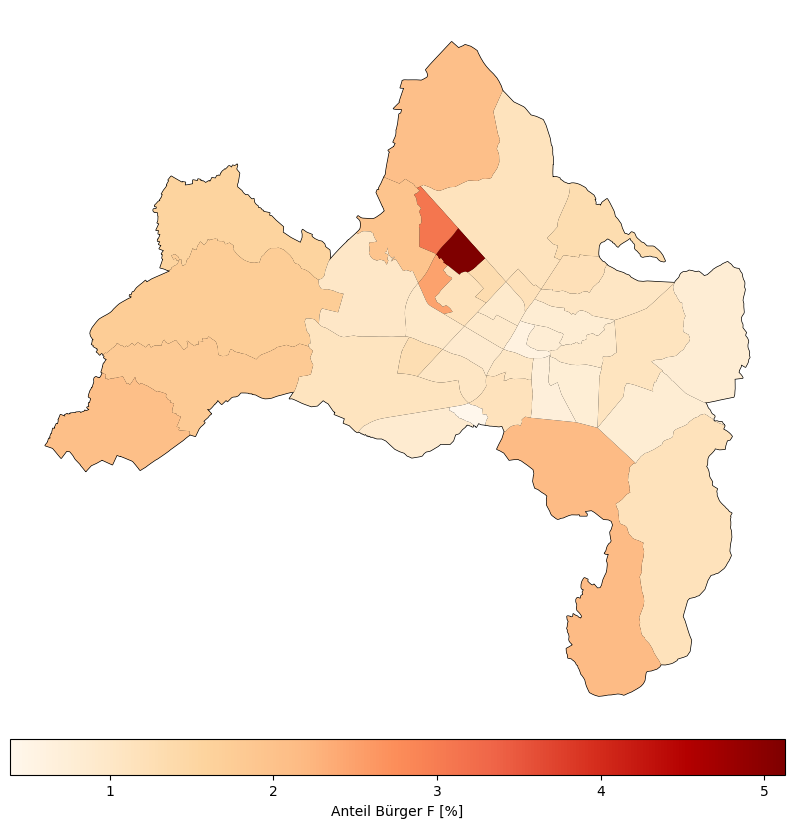

In [42]:
karte_stadtbezirke(joined,'Bürger_F')

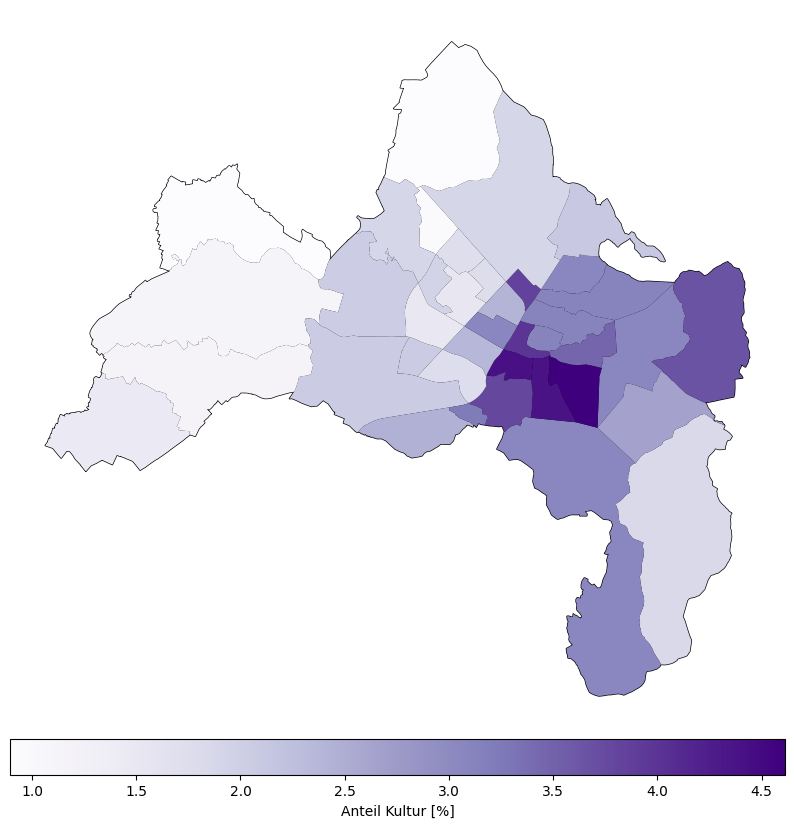

In [43]:
karte_stadtbezirke(joined,'Kultur')

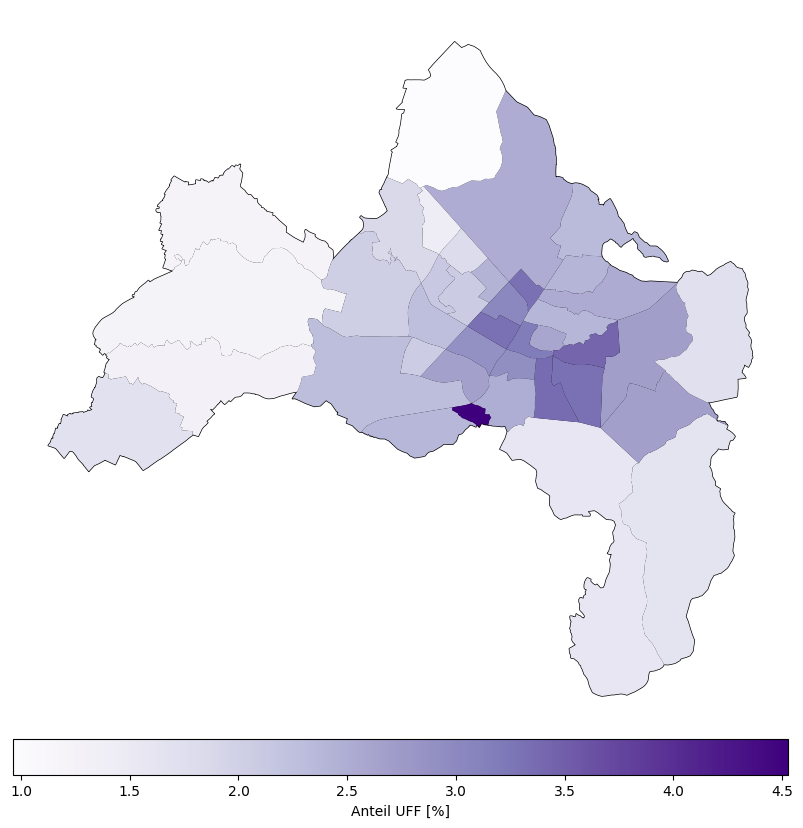

In [44]:
karte_stadtbezirke(joined,'UFF')

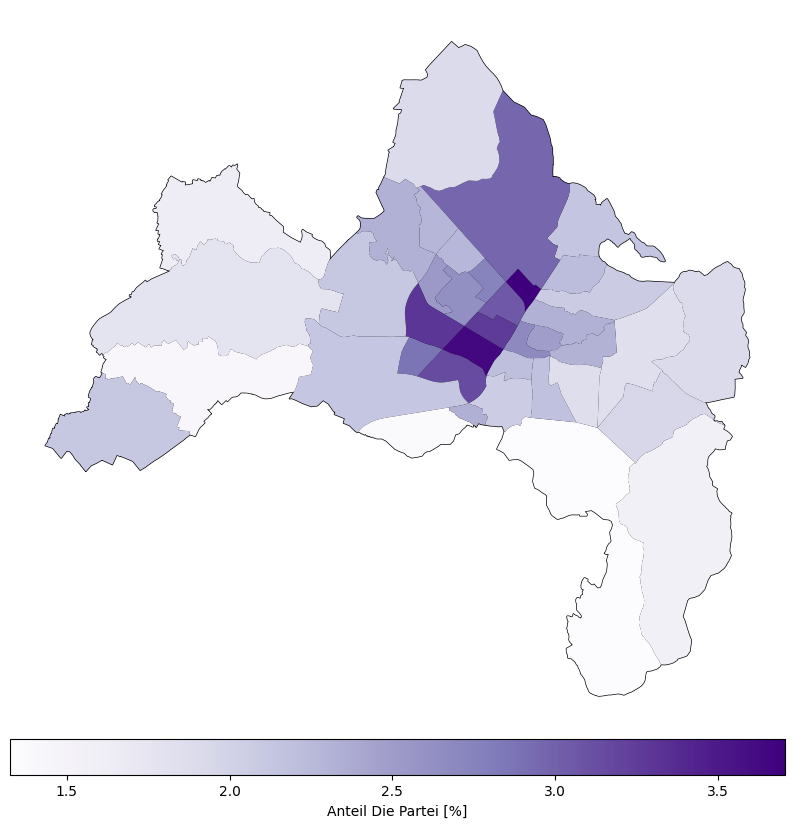

In [45]:
karte_stadtbezirke(joined,'DIE_PARTEI')

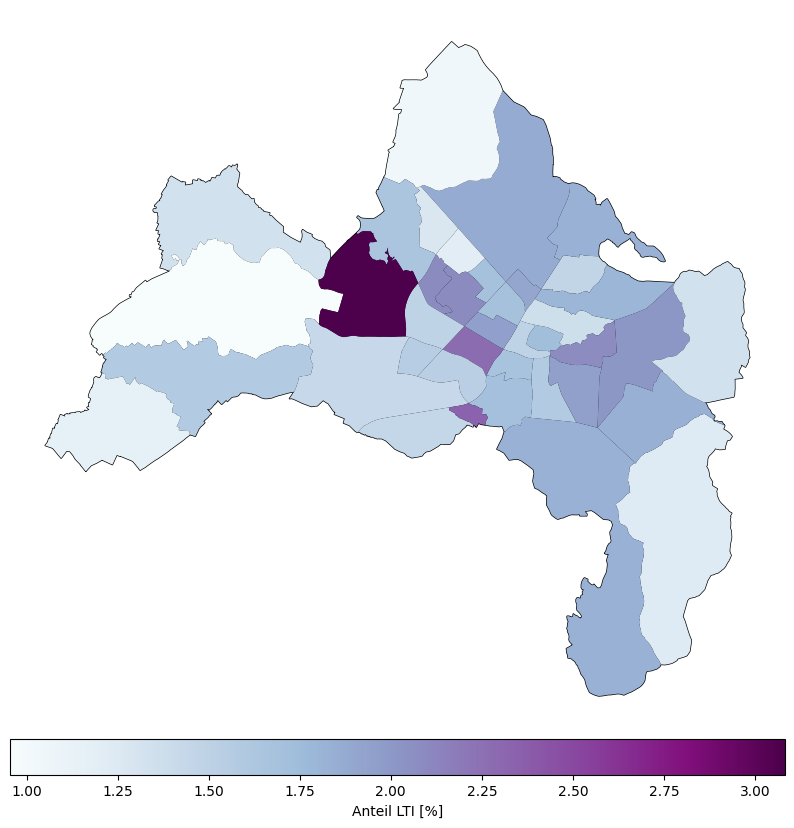

In [46]:
karte_stadtbezirke(joined,'LTI')

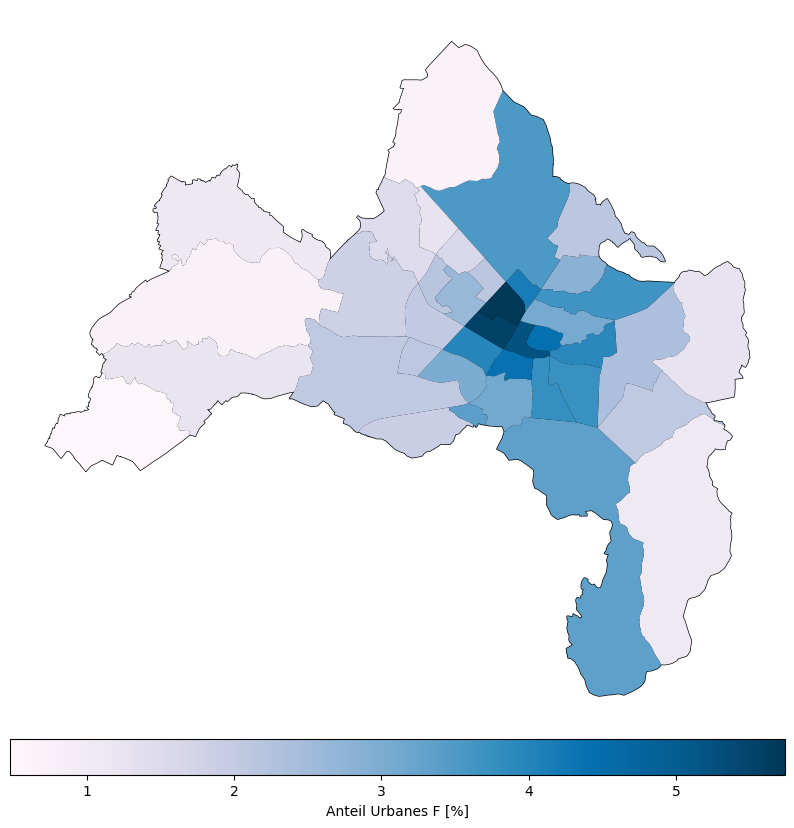

In [47]:
karte_stadtbezirke(joined,'Urbanes_F')

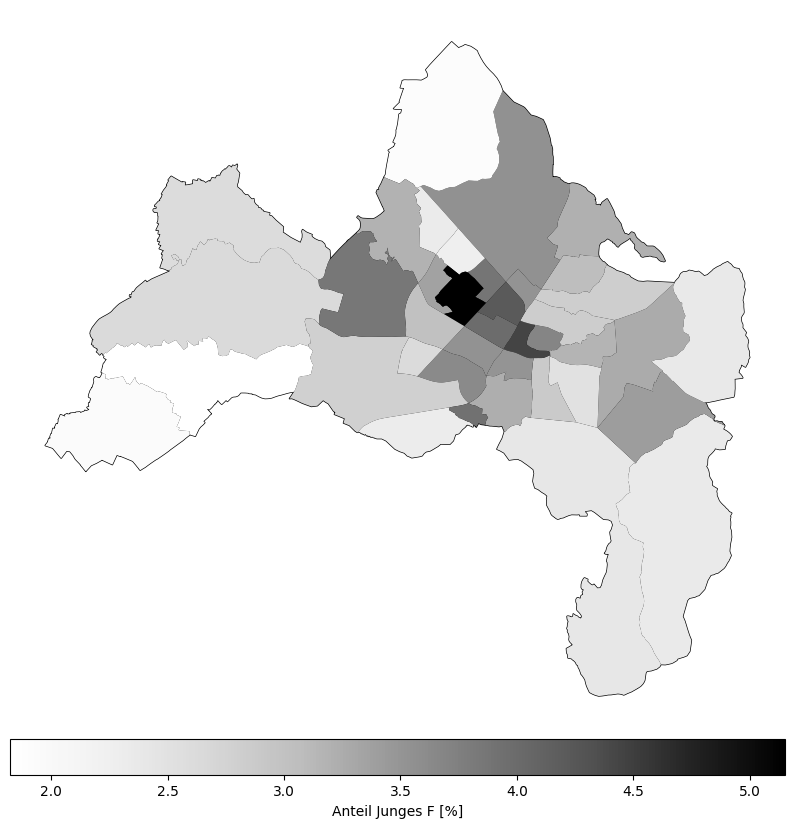

In [48]:
karte_stadtbezirke(joined,'Junges_F')

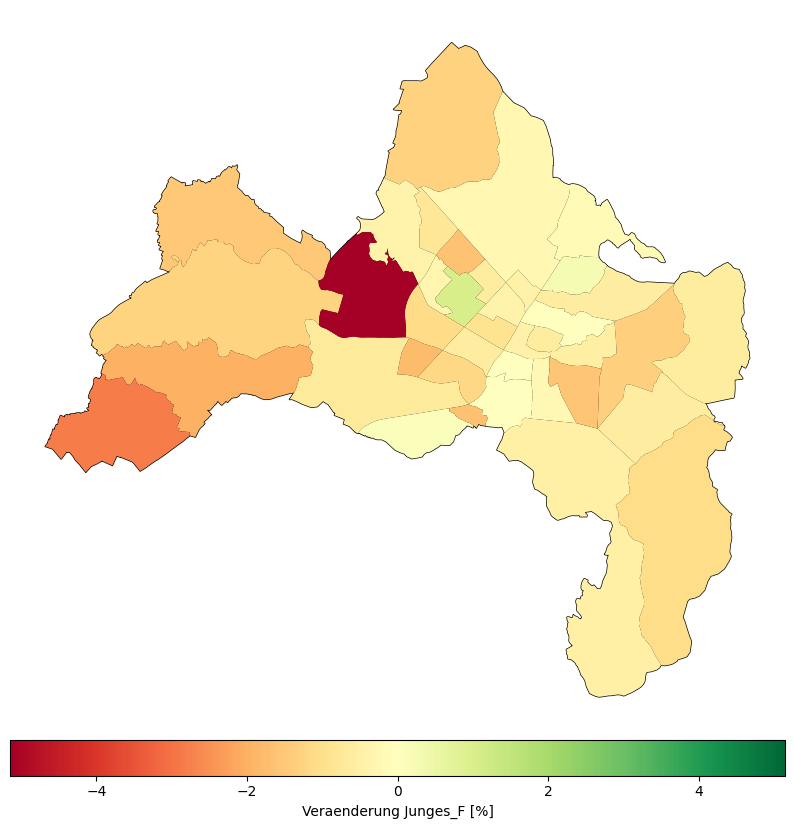

In [25]:
karte_stadtbezirke(joined,'Junges_F_differenz')

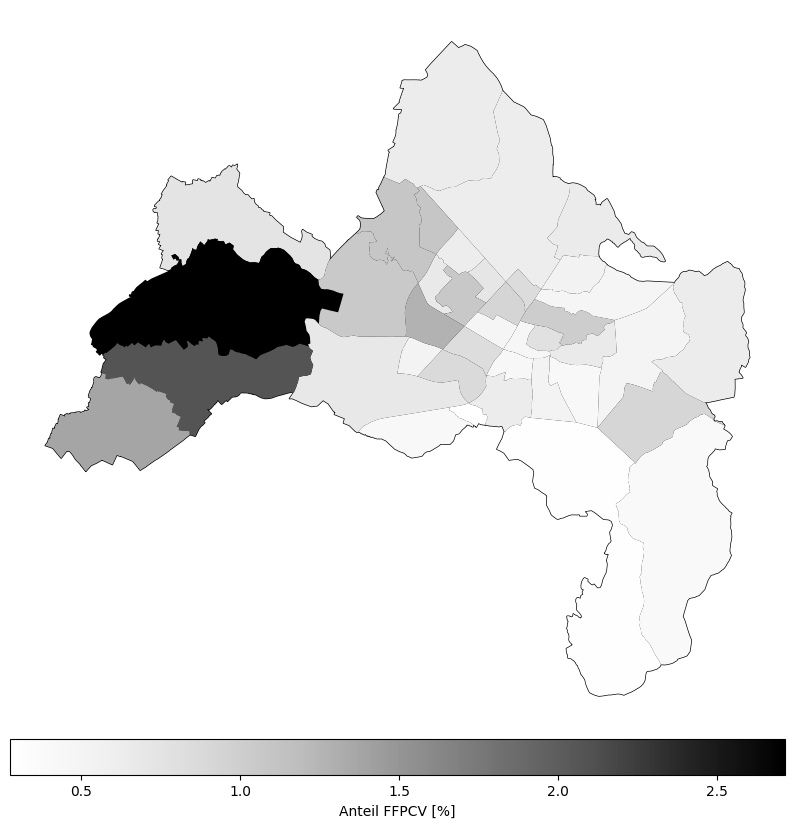

In [49]:
karte_stadtbezirke(joined,'FFPCV')

## Wahlbezirke Korrelation Parteien

Die Aehnlichkeit der prozentulen Stimmenverteilung kann Hinweise geben auf Aehnlichkeit der Waehler. 

Zunaechst die etwas groesseren Parteien. 
Ein Wert von ist exact gleich (und wird beim vergleich mit sich selbst erreicht) und wert von -1, ist exact das Gegenteil, waehrend 0 genau zufaellig ist. 

                      GRÜNE_prozent_gem24  CDU_prozent_gem24  \
GRÜNE_prozent_gem24              1.000000          -0.404418   
CDU_prozent_gem24               -0.404418           1.000000   
SPD_prozent_gem24               -0.372112           0.130443   
FDP_prozent_gem24               -0.082852           0.535423   
LiSSt._prozent_gem24             0.216436          -0.770090   
AfD_prozent_gem24               -0.725063           0.117757   
FW_prozent_gem24                -0.586882           0.693898   

                      SPD_prozent_gem24  FDP_prozent_gem24  \
GRÜNE_prozent_gem24           -0.372112          -0.082852   
CDU_prozent_gem24              0.130443           0.535423   
SPD_prozent_gem24              1.000000           0.011873   
FDP_prozent_gem24              0.011873           1.000000   
LiSSt._prozent_gem24          -0.239454          -0.612718   
AfD_prozent_gem24              0.166885          -0.156473   
FW_prozent_gem24               0.206424           0.3

<AxesSubplot:>

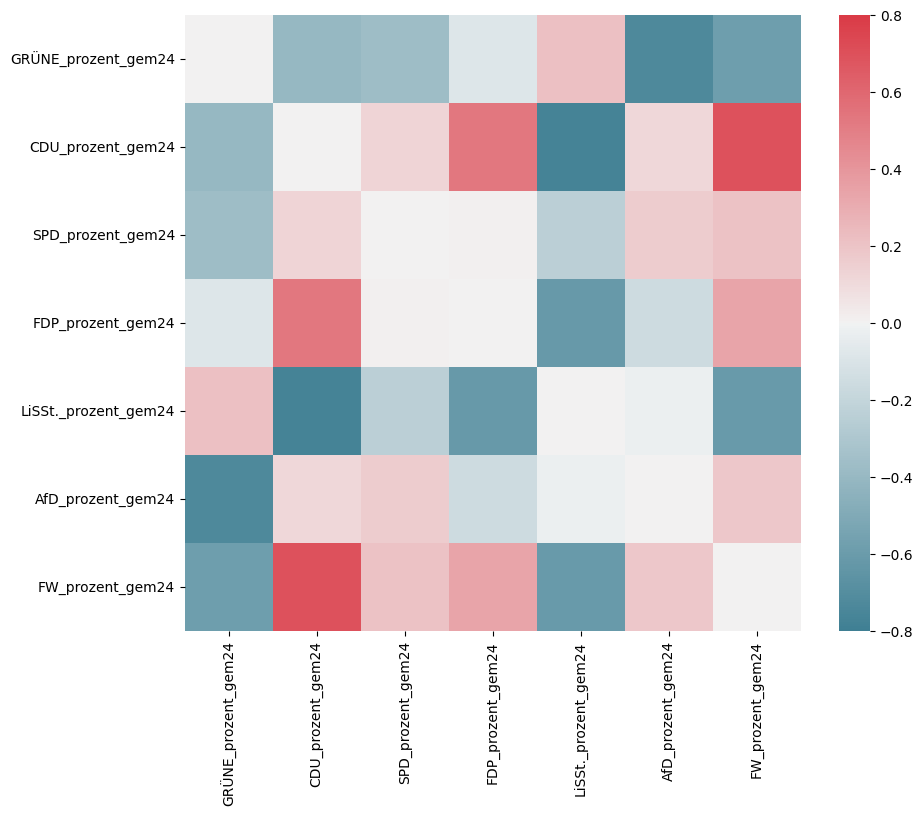

In [58]:
corr_wahlbezirke=wahl_bezirke.loc[:,['GRÜNE_prozent_gem24','CDU_prozent_gem24','SPD_prozent_gem24','FDP_prozent_gem24','LiSSt._prozent_gem24','AfD_prozent_gem24','FW_prozent_gem24']].corr()

print(corr_wahlbezirke)

for i in range(corr_wahlbezirke.shape[0]):
    corr_wahlbezirke.iloc[i,i]=0
f, ax = plt.subplots(figsize=(10, 8))    
sns.heatmap(corr_wahlbezirke,vmin=-0.8,vmax=0.8,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    square=True, ax=ax)

Die Gruenenwahler verteilen verschieden von allen anderen Waehlern, eine kleine Aehnlichkeit besteht zu linker Liste. Der groeste Unterschied besteht zu AfD. 

CDU Waehler verteilen sich aehnlich wie FW Waehler und FDP Waehler.  Der groeste Unterschied besteht zu Linke Liste. 

SPD Waehler verteilen  verschieden von allen anderen Waehlern, eine kleine Aehnlichkeit besteht zu freien Waehlern.  Der groeste Unterschied besteht zu Gruenen, aber so gross wie fuer andere Parteien. 


FDP Waehler verteilen sich aehnlich wie CDU Waehler und Freie Waehler.  Der groeste Unterschied besteht zu Linke Liste. 

Linke Liste  Waehler  verschieden von allen anderen Waehlern, eine kleine Aehnlichkeit besteht zu Gruenen.
 Der groeste Unterschied besteht zu CDU. 

AfD waehler verteilen sich verschieden von allen adneren Waehler,  eine sehr kleine Aehnlichkeit besteht zu Freien Waehlern und SPD. 
 Der groeste Unterschied besteht zu Gruenen. 



Nun die kleineren. 

In [53]:
corr_wahlbezirke2=wahl_bezirke.loc[:,['CDU_prozent_gem24', 'GRÜNE_prozent_gem24', 'SPD_prozent_gem24',
       'AfD_prozent_gem24', 'FDP_prozent_gem24', 'FW_prozent_gem24',
       'LiSSt._prozent_gem24', 'DIE_PARTEI_prozent_gem24', 'GAF_prozent_gem24',
       'FL_prozent_gem24', 'Volt_prozent_gem24', 'Junges_F_prozent_gem24',
       'Urbanes_F_prozent_gem24', 'Kultur_prozent_gem24',
       'Bürger_F_prozent_gem24', 'UFF_prozent_gem24', 'LTI_prozent_gem24',
       'APPD_prozent_gem24', 'FFPCV_prozent_gem24',
       'Meinrad_Spitz_prozent_gem24']].corr()

In [56]:
print(corr_wahlbezirke2.iloc[7:,:].T)

                             DIE_PARTEI_prozent_gem24  GAF_prozent_gem24  \
CDU_prozent_gem24                           -0.470472          -0.725189   
GRÜNE_prozent_gem24                         -0.194431           0.503193   
SPD_prozent_gem24                           -0.072660          -0.322409   
AfD_prozent_gem24                            0.285741          -0.327605   
FDP_prozent_gem24                           -0.402668          -0.471005   
FW_prozent_gem24                            -0.323766          -0.629430   
LiSSt._prozent_gem24                         0.493947           0.628880   
DIE_PARTEI_prozent_gem24                     0.000000           0.249779   
GAF_prozent_gem24                            0.249779           0.000000   
FL_prozent_gem24                            -0.137171          -0.189837   
Volt_prozent_gem24                           0.298990           0.426613   
Junges_F_prozent_gem24                       0.331413           0.373763   
Urbanes_F_pr

<AxesSubplot:>

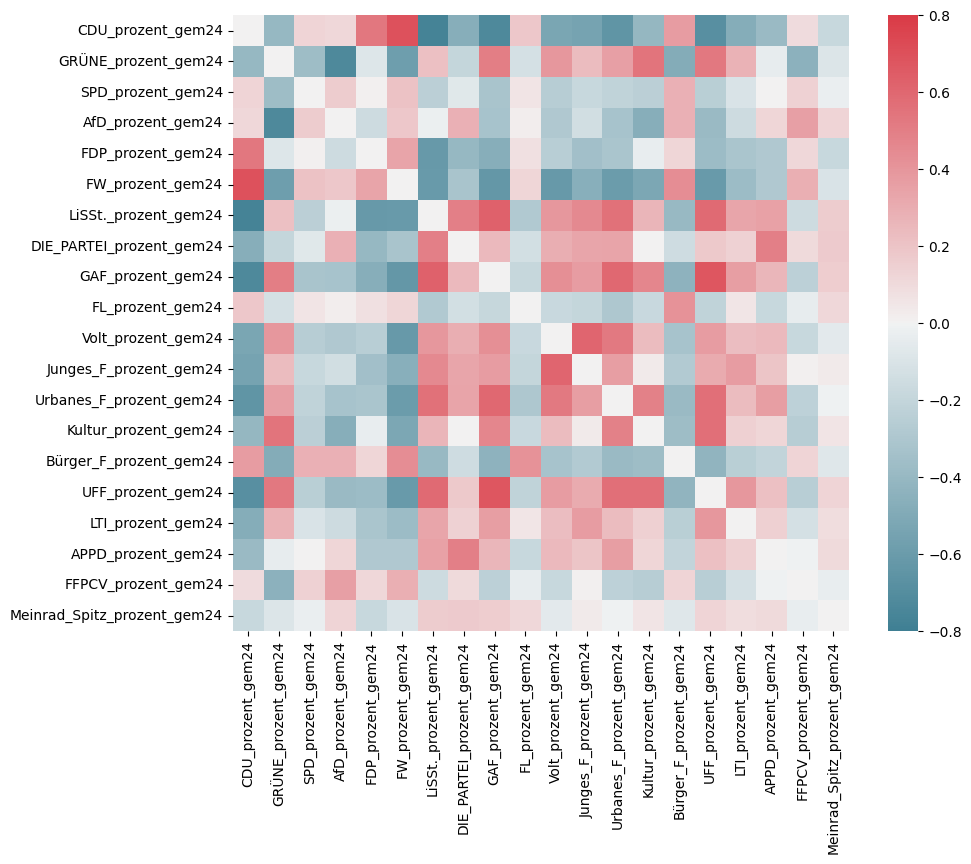

In [57]:

for i in range(corr_wahlbezirke2.shape[0]):
    corr_wahlbezirke2.iloc[i,i]=0
f, ax = plt.subplots(figsize=(10, 8))    
sns.heatmap(corr_wahlbezirke2,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-0.8, vmax=0.8,
    square=True, ax=ax)

Die PARTEI ist am aehnlichsten zu APPD und Linker Liste, und am verschiedensten zu CDU.

Die GAF ist am aehnlichsten zu UFF, und Linker Liste, und am verschiedensten zu CDU.

Freiburg Lebenswert ist am aehnlichsten zu Buerger Freiburg, und am verschiedensten zu Linker Liste und Urbanes.

Volt ist am aehnlichsten zu Junges F, und am verschiedensten zu FW und CDU.

Urbanes Freiburg ist am aehnlichsten zu GAF und Linker Liste, und am verschiedensten zu CDU.

Die Kulturliste ist am aehnlichsten zu UFF, und Gruenen, und am verschiedensten zu FW und CDU.

Die Buerger Freiburg ist am aehnlichsten die Freiburg Lebenswerty, CDu, und FW und am verschiedensten zu den Gruenen. 

Die Liste Teilhabe und Inklusion ist am aehnlichsten zu GAF, UFF und Junges Freiburg und am verschiedensten zu  CDU

Fuer Freiburg Politik aus Christlicher Verantwortung ist aehnlich zu AfD und FW, und am verscheidensten zu Gruenen. 

Meinrad Spitze hat keine relevante Aehnlichkeit, es also unklar zu welchen Lager die Liste gehoert. 